对药品销售数据，利用适当的统计方法对相关数据进行月均消费次数、月均消费金额、客单价和消费趋势等几个业务指标进行分析。
数据分析一般过程为：数据获取、数据清洗、建模分析、可视化

#  1 数据获取
本数据集为网络获取

## 数据描述、导入数据

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import warnings
warnings.filterwarnings('ignore')

filename = r'./data/朝阳医院2018年销售数据.xlsx'
data = pd.ExcelFile(filename)
data = data.parse('Sheet1',dtype='object')
data.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,*******528,236701,强力VC银翘片,6,82.8,69
1,2018-01-02 星期六,*******528,236701,清热解毒口服液,1,28,24.64
2,2018-01-06 星期三,*******2828,236701,感康,2,16.8,15
3,2018-01-11 星期一,*******0343428,236701,三九感冒灵,1,28,28
4,2018-01-15 星期五,*******54328,236701,三九感冒灵,8,224,208


```python
data = pd.ExcelFile(filename)
```

使用 `pd.ExcelFile` 读取 Excel 文件。这返回一个 `ExcelFile` 对象，可以从中解析多个工作表。

```python
data = data.parse('Sheet1', dtype='object')
```

从 `ExcelFile` 对象中解析名为 `'Sheet1'` 的工作表，并将数据存储到一个 DataFrame 中。这里指定了 `dtype='object'`，这意味着所有的数据都将被读取为对象类型，这有助于避免由于数据类型的自动转换导致的错误。

#### 接下来可以查看数据的相关信息

In [2]:
# 查看行列信息
data.shape

(6578, 7)

In [3]:
# 查看索引
data.index

RangeIndex(start=0, stop=6578, step=1)

In [4]:
# 查看列名
data.columns

Index(['购药时间', '社保卡号', '商品编码', '商品名称', '销售数量', '应收金额', '实收金额'], dtype='object')

In [5]:
# 查看每一列的数目
data.count()

购药时间    6576
社保卡号    6577
商品编码    6577
商品名称    6577
销售数量    6577
应收金额    6577
实收金额    6577
dtype: int64

从上我们可以看到该数据集一共有6578行数据，其中第一行是标题，有7列。“购药时间”有6576条数据，而其余的有6577条，说明数据中存在着缺失值。“购药时间”缺失一行数据，在这里我们要对数据进行缺失值等进一步处理。

#  2 数据清洗

####  数据清洗的过程包括：选择子集、列名重命名、缺失值处理、数据类型转换、异常值处理以及数据排序。
## 2.1 选择子集
在数据分析的过程中，有可能数据量会非常大，但并不是每一列都有分析的价值，这时候就要从这些数据中选择有用的子集进行分析，这样才能提高分析的价值和效率。但是本例子中暂不需要选择子集，可以忽略这一步。

## 2.2 列名重命名
在数据分析的过程中，有些列名和数据容易混淆或者让人产生歧义。比如说本数据集的第一列是“购药时间”，然而我们做数据分析的时候应该是站在商家的角度来看，因此将列名改为“销售时间”就会更清晰明了。在这里可以采用rename函数来实现：

In [6]:
# 数据列重新命名
data.rename(columns={'购药时间':'销售时间'},inplace=True)
# inplace参数设置为“True”表示不创建新的对象，直接对原始对象进行修改，替换原数据
# inplace参数设置为“False”表示对数据进行修改，创建并返回新的对象承载修改结果
data.tail(10)

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
6568,2018-04-26 星期二,*******2558628,2367011,高特灵,2,11.2,10
6569,2018-04-26 星期二,*******45828,2367011,高特灵,2,11.2,10
6570,NaN,*******8628,2367011,高特灵,10,56,56
6571,2018-04-25 星期二,*******,2367011,高特灵,2,11.2,9.86
6572,2018-04-27 星期三,*******0482828,2367011,高特灵,1,5.6,5
6573,2018-04-27 星期三,*******86128,2367011,高特灵,10,56,54.8
6574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6575,2018-04-27 星期三,0010087865628,2367011,高特灵,2,11.2,9.86
6576,2018-04-27 星期三,0013406628,2367011,高特灵,1,5.6,5
6577,2018-04-28 星期四,0011926928,2367011,高特灵,2,11.2,10


## 2.3 缺失值处理
获取的数据中很可能存在这缺失值，这会对分析的结果造成影响。我们经过查看数据集基本的信息，发现“购药时间”和“社保卡号”各缺失一行数据。在这里可以使用dropna函数对缺失值进行删除。

In [7]:
# 处理缺失值
print('处理缺失值之前',data.shape)
data = data.dropna(subset=['销售时间','社保卡号'],how='any')
print('处理缺失值之后',data.shape)
data.info()

处理缺失值之前 (6578, 7)
处理缺失值之后 (6576, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 6576 entries, 0 to 6577
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   销售时间    6576 non-null   object
 1   社保卡号    6576 non-null   object
 2   商品编码    6576 non-null   object
 3   商品名称    6576 non-null   object
 4   销售数量    6576 non-null   object
 5   应收金额    6576 non-null   object
 6   实收金额    6576 non-null   object
dtypes: object(7)
memory usage: 411.0+ KB


```python
data = data.dropna(subset=['销售时间','社保卡号'],how='any')
```

目的是删除data数据框中在`销售时间`或`社保卡号`列上包含缺失值（NaN）的所有记录。如果这两列中的任意一列有缺失值，对应的数据行就会被移除。

In [8]:
data.tail(10)
# 可以使用tail查看尾部的10行数据，发现6570和6574行数据被删除

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
6566,2018-04-25 星期一,*******9192628,2367011,高特灵,3,16.8,15.46
6567,2018-04-25 星期一,*******9350528,2367011,高特灵,2,11.2,9.86
6568,2018-04-26 星期二,*******2558628,2367011,高特灵,2,11.2,10
6569,2018-04-26 星期二,*******45828,2367011,高特灵,2,11.2,10
6571,2018-04-25 星期二,*******,2367011,高特灵,2,11.2,9.86
6572,2018-04-27 星期三,*******0482828,2367011,高特灵,1,5.6,5
6573,2018-04-27 星期三,*******86128,2367011,高特灵,10,56,54.8
6575,2018-04-27 星期三,0010087865628,2367011,高特灵,2,11.2,9.86
6576,2018-04-27 星期三,0013406628,2367011,高特灵,1,5.6,5
6577,2018-04-28 星期四,0011926928,2367011,高特灵,2,11.2,10


## 2.4 数据类型的转换
在导入数据的时候为了防止导入不进来，python会强制转换为object类型，然而这样的数据类型在分析的过程中不利于运算和分析。比如“销售数量”、“实收金额”等应该是浮点型。
在“销售时间”这一列数据中存在星期这样的数据，但在数据分析过程中不需要用到，因此要把销售时间列中日期和星期使用split函数进行分割，分割后的时间，返回的是Series数据类型

In [9]:
# 定义一个函数去除销售时间里的星期
def splittime(timecolumn):
    timelist =[]
    for val in timecolumn:
        data = val.split(' ')[0] #注意引号内有一个空格，否则会提示没有分隔符；[0]表示分割后去第一个值
        timelist.append(data)
    
    timeSer = Series(timelist)
    return timeSer

time = data.loc[:,'销售时间']  #获取销售时间这一列数据
timedata = splittime(time)     #调用函数去除星期，获得日期
data.loc[:,'销售时间'] = timedata #修改销售时间这一列的数据
data.tail(10)
    

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
6566,2018-04-25,*******9192628,2367011,高特灵,3,16.8,15.46
6567,2018-04-25,*******9350528,2367011,高特灵,2,11.2,9.86
6568,2018-04-26,*******2558628,2367011,高特灵,2,11.2,10
6569,2018-04-26,*******45828,2367011,高特灵,2,11.2,10
6571,2018-04-27,*******,2367011,高特灵,2,11.2,9.86
6572,2018-04-27,*******0482828,2367011,高特灵,1,5.6,5
6573,2018-04-27,*******86128,2367011,高特灵,10,56,54.8
6575,2018-04-28,0010087865628,2367011,高特灵,2,11.2,9.86
6576,NaN,0013406628,2367011,高特灵,1,5.6,5
6577,NaN,0011926928,2367011,高特灵,2,11.2,10


这段代码定义了一个函数 `splittime`，用于从包含日期和时间的字符串中提取日期部分，并去除星期信息。

```python
def splittime(timecolumn):
```

这里定义了一个名为 `splittime` 的函数，接受一个参数 `timecolumn`，这是一个包含日期和时间信息的序列。

```python
timelist = []
```

初始化一个空列表 `timelist`，用于存储处理后的日期字符串。

```python
data = val.split(' ')[0]
```

对于每一个值 `val`，使用 `split(' ')` 方法按空格分割字符串，并取第一个元素（即日期部分）。这里假设日期和时间是由一个空格分隔的。


```python
timeSer = Series(timelist)
```

使用 `pandas` 的 `Series` 类型将 `timelist` 转换为一个 `Series` 对象。

接着把切割后的日期转为时间格式，方便后面的数据统计

In [10]:
data['销售时间'] = pd.to_datetime(data['销售时间'], format='%Y-%m-%d', errors='coerce')
data['销售数量'] = pd.to_numeric(data['销售数量'], errors='coerce')
data['实收金额'] = pd.to_numeric(data['实收金额'], errors='coerce')
data['应收金额'] = pd.to_numeric(data['应收金额'], errors='coerce')
data.dtypes

销售时间    datetime64[ns]
社保卡号            object
商品编码            object
商品名称            object
销售数量             int64
应收金额           float64
实收金额           float64
dtype: object

- `pd.to_datetime`: 将'销售时间'列转换为datetime类型。
- `format='%Y-%m-%d'`: 指定日期时间字符串的格式。在这个例子中，日期格式为 `'年-月-日'`。
- `errors='coerce'`: 如果转换过程中遇到无法识别的日期字符串，则将其转换为 `NaT`（Not a Time）。
- `pd.to_numeric`：将'销售数量'、'实收金额'和'应收金额'列转换为数值类型。

In [11]:
# 在进行日期时间类型转换的时候，不符合日期格式的数据将被换成None值，需要再次删除“销售时间”和“社保卡号”上的空行
data = data.dropna(subset=['销售时间','社保卡号'],how='any')
data.tail(10)

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
6564,2018-04-24,*******3294128,2367011,高特灵,1,5.6,5.60
6565,2018-04-25,*******9172628,2367011,高特灵,1,5.6,5.00
6566,2018-04-25,*******9192628,2367011,高特灵,3,16.8,15.46
6567,2018-04-25,*******9350528,2367011,高特灵,2,11.2,9.86
6568,2018-04-26,*******2558628,2367011,高特灵,2,11.2,10.00
6569,2018-04-26,*******45828,2367011,高特灵,2,11.2,10.00
6571,2018-04-27,*******,2367011,高特灵,2,11.2,9.86
6572,2018-04-27,*******0482828,2367011,高特灵,1,5.6,5.00
6573,2018-04-27,*******86128,2367011,高特灵,10,56.0,54.80
6575,2018-04-28,0010087865628,2367011,高特灵,2,11.2,9.86


## 2.5 异常值处理
到这一步，我们可以利用describe()函数查看数据是否还存在异常

In [12]:
data.describe()
#我们可以看出最小值min出现了负数，这些都是异常值，这里要去掉异常值，排除异常值造成影响。
#我们可以创建一个掩模，来筛选出正常的数据，也就是大于0的值，排除“销售数量”这一列中的负值

,销售时间,销售数量,应收金额,实收金额
count,6551,6551.000000,6551.000000,6551.000000
mean,2018-04-10 21:07:26.771485696,2.384369,50.437094,46.273250
min,2018-01-01 00:00:00,-10.000000,-374.000000,-374.000000
25%,2018-02-23 00:00:00,1.000000,14.000000,12.320000
50%,2018-04-15 00:00:00,2.000000,28.000000,26.500000
75%,2018-05-28 00:00:00,2.000000,59.600000,53.000000
max,2018-07-19 00:00:00,50.000000,2950.000000,2650.000000
std,NaN,2.374874,87.685693,81.048548


In [13]:
#销售量出现了负数，很显然数据是异常的，应去掉以排除异常值的影响
delete = data.loc[:,'销售数量']>0
data = data.loc[delete,:]
data.describe()

,销售时间,销售数量,应收金额,实收金额
count,6508,6508.000000,6508.000000,6508.000000
mean,2018-04-10 20:49:02.839582208,2.405501,50.915688,46.716323
min,2018-01-01 00:00:00,1.000000,1.200000,0.030000
25%,2018-02-23 00:00:00,1.000000,14.000000,12.600000
50%,2018-04-15 00:00:00,2.000000,28.000000,27.000000
75%,2018-05-28 00:00:00,2.000000,59.600000,53.000000
max,2018-07-19 00:00:00,50.000000,2950.000000,2650.000000
std,NaN,2.364213,87.639578,80.987855


这段代码用于筛选出 `'销售数量'` 列大于 0 的行，并计算这些行的基本统计描述。

```python
delete = data.loc[:, '销售数量'] > 0
```

创建一个布尔索引`delete`。这个索引用于标记data数据框中'销售数量'列大于 0 的行。

```python
data = data.loc[delete, :]
```

根据布尔索引`delete`筛选出data数据框中'销售数量'大于 0 的行，并将筛选后的数据重新赋值给`data`。

#### 接下来可以利用drop_duplicates()函数删除重复的数据

In [14]:
# 删除重复的数据
data = data.drop_duplicates(subset=['销售时间','社保卡号'])

这段代码的主要功能是：从 DataFrame `data` 中删除 `'销售时间'` 和 `'社保卡号'` 列组合重复的行。

## 2.6 数据排序
此时时间是没有按顺序排列的，所以还是需要排序一下，排序之后索引会被打乱，所以也需要重置一下索引。其中by表示按哪一列进行排序，ascending=True表示升序排列，ascending=False表示降序排列

In [15]:
data = data.sort_values(by='销售时间',ascending=True)
data = data.reset_index(drop=True)
data

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01,*******528,236701,强力VC银翘片,6,82.8,69.0
1,2018-01-01,*******83128,861464,复方利血平片(复方降压片),1,2.5,2.2
2,2018-01-01,*******0654328,861458,复方利血平氨苯蝶啶片(北京降压0号),1,10.3,9.2
3,2018-01-01,*******91628,861456,酒石酸美托洛尔片(倍他乐克),2,14.0,12.6
4,2018-01-01,*******6728,865099,硝苯地平片(心痛定),2,3.4,3.0
...,...,...,...,...,...,...,...
5286,2018-07-19,*******2828,865425,G苯磺酸氨氯地平片(6盒/疗程),6,69.0,57.5
5287,2018-07-19,*******9136328,865099,硝苯地平片(心痛定),2,2.4,2.0
5288,2018-07-19,*******6928,865099,硝苯地平片(心痛定),2,2.4,2.0
5289,2018-07-19,*******9383628,2367011,开博通,2,62.0,56.0


```python
data = data.reset_index(drop=True)
```

这里使用 `reset_index` 方法重新设置 DataFrame 的索引。
`drop=True`: 指定是否删除旧的索引列。如果设置为 `True`，则旧的索引不会被保留为一列；如果设置为 `False`，则旧的索引会被保留为新的一列。

到这里，我们的数据清洗工作顺利完成。

#  3 建模分析
对数据进行处理之后，需要利用数据构建模型，计算相关的业务指标并用可视化的方式呈现结果。


## 3.1 月均消费次数
月均消费次数 = 总消费次数/月份数

In [16]:
# 计算月均消费次数
# 查看多少行，也就是总计多少次消费
num = data.shape[0]
print('共计消费',num,' 次')

#计算月份数
start = data.loc[0,'销售时间']
end = data.loc[num-1,'销售时间']

totaldays =(end-start).days
months = totaldays//30
print('共计',months,' 个月')

#月均消费次数
count_month_mean = num//months
print('月均消费',count_month_mean,' 次')

共计消费 5291  次
共计 6  个月
月均消费 881  次


```python
num = data.shape[0]
```

这里首先计算 DataFrame `data` 的行数，即消费次数总数。`data.shape[0]` 返回 DataFrame 的行数。

```python
start = data.loc[0, '销售时间']
end = data.loc[num-1, '销售时间']
```

这里选取 `'销售时间'` 列的第一个和最后一个值，分别作为开始时间和结束时间。

```python
totaldays = (end - start).days
```

计算从开始时间到结束时间的总天数。这里使用了 `datetime` 对象的减法操作，得到一个 `Timedelta` 对象，然后使用 `.days` 属性获取总天数。

```python
months = totaldays // 30
```

使用整除运算符 `//` 来估算总月份数。这里假设每个月有 30 天，因此将总天数除以 30 来估算总月份数。

```python
count_month_mean = num // months
```

使用整除运算符 `//` 来计算月均消费次数。这里将消费次数总数除以估算的总月份数来得到月均消费次数。

## 3.2 月均消费金额
    
月均消费金额 = 总消费金额 / 月份数

In [17]:
# 月均消费金额
money = data.loc[:,'实收金额'].sum()
money_month_mean = money//months
print('月均消费金额',money_month_mean,' 元')

月均消费金额 38994.0  元


## 3.3 客单价

客单价 = 总消费金额 / 总消费次数

In [18]:
# 客单价
p = money/num
print('客单价为',p,' 元')

客单价为 44.21926478926479  元


#  4 可视化
## 4.1 消费趋势

消费趋势图呈现出每天销售药品的情况。
首先导入相关的包：

In [19]:
# 消费趋势图
import matplotlib
import matplotlib.pyplot as plt
# 画图是用于显示中文字符
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei'] # 设置字体为黑体
# 在操作之前先复制一份数据，防止影响后清洗后的数据
groupData = data
groupData
#设置销售时间为索引
groupData.index=groupData["销售时间"] # 这一步非常关键，否则按月分组无法进行

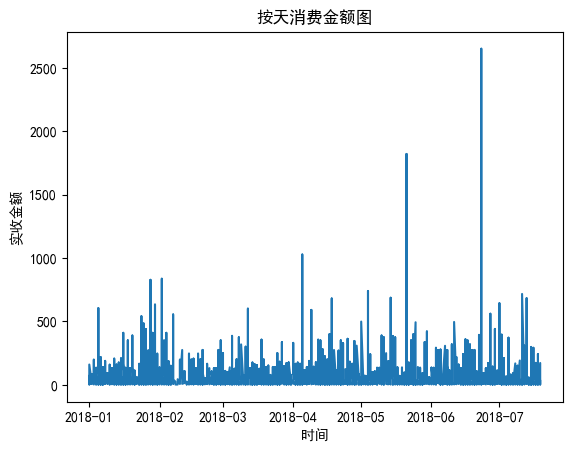

In [20]:
# 接下来就可以画图了
plt.plot(groupData['实收金额'])
plt.title('按天消费金额图')
plt.xlabel('时间')
plt.ylabel('实收金额')
plt.show()

```python
plt.plot(groupData['实收金额'])
```

这一行使用 `plt.plot()` 函数绘制了一个简单的折线图，其中 x 轴默认是索引值（在这里是 "销售时间"），y 轴是 `'实收金额'` 列的数据。由于 `groupData` 的索引已经被设置为 `"销售时间"`，所以 x 轴将会自动使用这个时间序列。

从结果可以看出，每天消费总额差异较大，除了个别天出现比较大笔的消费，大部分人消费情况维持在500元以内。

## 4.2 每月消费金额

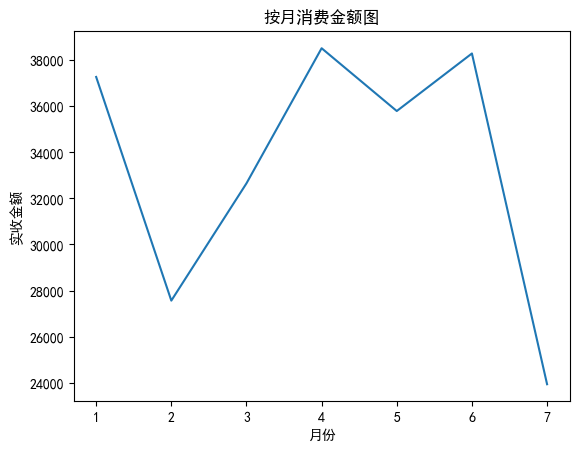

In [21]:
#将销售时间聚合按月分组,计算每个月的消费总额
#monthDF=groupData.groupby(groupData.index.month).sum()
# 假设 '实收金额' 是你想要聚合的唯一数值列
monthDF = groupData.groupby(groupData.index.month)['实收金额'].sum()
#描绘按月消费金额图
plt.plot(monthDF)
plt.title("按月消费金额图")
plt.xlabel("月份")
plt.ylabel("实收金额")
plt.show()

```python
monthDF = groupData.groupby(groupData.index.month)['实收金额'].sum()
```

- 这一行代码首先使用 `groupby()` 方法对 `groupData` DataFrame 的索引进行分组。这里假设 `groupData` 的索引已经被设置为 `"销售时间"`，并且该列已经被正确地转换为了日期时间类型。
- `groupData.index.month` 获取每个索引项（即日期时间）的月份部分，然后基于这些月份对数据进行分组。
- `sum()` 方法用于对每个分组内的 `'实收金额'` 列求和，得到每个月份的总消费金额。结果存储在新的 DataFrame `monthDF` 中。

```python
plt.plot(monthDF['实收金额'])
```

- 这一行使用 `plt.plot()` 函数绘制一个简单的折线图，其中 x 轴默认是 `monthDF` 的索引（即月份），y 轴是 `'实收金额'` 列的数据。

需要注意的是，`groupby(groupData.index.month)` 只获取月份信息，因此 x 轴上只会有数字（1-12），代表每年的各个月份。如果你想要更详细的月份标签，例如“Jan”、“Feb”等，或者想要跨年的月份也能够正确显示，你可能需要对 x 轴的标签做一些额外的处理。

另外，`groupby(groupData.index.month)` 的结果可能会导致月份不连续的情况出现，尤其是在数据量较小或者某些月份没有数据的情况下。如果需要，你可以使用 `pd.Grouper(freq='M')` 或者其他方法来确保每个月都有记录。

结果显示，7月消费金额最少，这是因为7月份的数据不完整，所以不具参考价值。
1月、4月、5月和6月的月消费金额差异不大，2月和3月的消费金额迅速降低，这可能是2月和3月处于春节期间，大部分人都回家过年的原因。

## 4.3 分析药品销售情况

对“商品名称”和“销售数量”这两列数据进行聚合为Series形式，方便后面统计，并按降序排序：

In [22]:
#聚合统计各种药品的销量
medicine=groupData[['商品名称','销售数量']]
re_medicine=medicine.groupby('商品名称')[['销售数量']].sum()
#对药品销售数量按降序排序
re_medicine=re_medicine.sort_values(by="销售数量",ascending=False)
#截取销售量最多的前十种药品，并用条形图可视化
top_medicine=re_medicine.iloc[:10,:]
print(top_medicine)

                   销售数量
商品名称                   
苯磺酸氨氯地平片(安内真)      1558
开博通                1328
酒石酸美托洛尔片(倍他乐克)      929
苯磺酸氨氯地平片(络活喜)       669
硝苯地平片(心痛定)          613
复方利血平片(复方降压片)       437
高特灵                 349
缬沙坦胶囊(代文)           315
非洛地平缓释片(波依定)        307
G琥珀酸美托洛尔缓释片(倍他乐克)   295


这段代码是从一个名为 `groupData` 的 DataFrame 中提取药品名称和销售数量，然后对这些数据进行聚合统计，排序，并选取销量最高的前十种药品，并打印出这些药品的信息。

```python
medicine = groupData[['商品名称', '销售数量']]
```

- 这一行创建了一个新的 DataFrame `medicine`，仅包含 `groupData` 中的两列：“商品名称” 和 “销售数量”。

```python
re_medicine = medicine.groupby('商品名称')[['销售数量']].sum()
```

- 这一行使用 `groupby()` 方法按照 “商品名称” 对 `medicine` DataFrame 进行分组。
- `[['销售数量']]` 指定要对 “销售数量” 列进行操作。
- `sum()` 方法对每个分组内的 “销售数量” 列求和，得到每种药品的总销量。结果被存储在一个新的 DataFrame `re_medicine` 中。

```python
top_medicine = re_medicine.iloc[:10, :]
```

- 这一行使用 `iloc` 属性从 `re_medicine` DataFrame 中选取前 10 行。
- `iloc[:10, :]` 表示选取前 10 行的所有列。这里的 `:` 表示选取所有列。

截取销售数量最多的前十种药品，并用条形图展示结果：

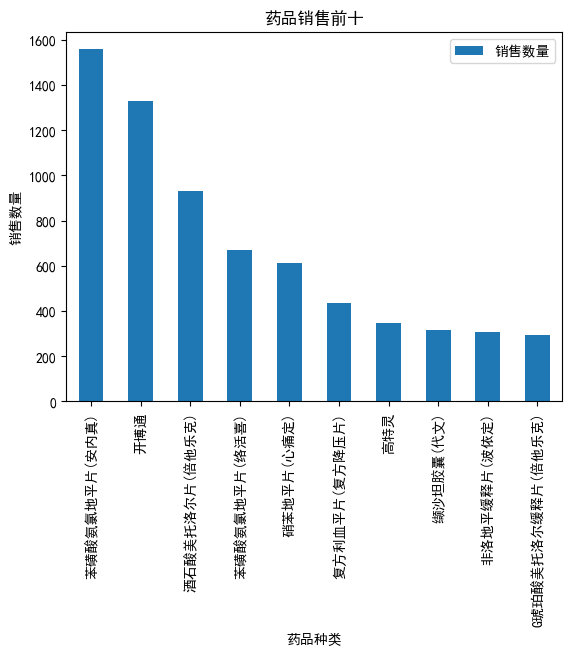

In [23]:
top_medicine.plot(kind='bar')
plt.title("药品销售前十")
plt.xlabel("药品种类")
plt.ylabel("销售数量")
plt.legend(loc=0)
plt.show()
# 得到销售数量最多的前十种药品信息，这些信息将会有助于加强医院对药房的管理。

```python
plt.legend(loc=0)
```

这一行设置了图例的位置。`loc=0` 表示让 Matplotlib 自动选择最佳位置放置图例。由于我们之前已经设置 `legend=False`，这里实际上不会显示图例，因此这一行代码可以省略。

最后，这些信息有助于加强医院对药房的管理，这确实是正确的。通过了解哪些药品最畅销，医院可以更好地管理库存、采购计划以及药物定价策略等。